In [48]:
import matplotlib.pyplot as plt
import nilearn.plotting as niplt # for debugging
import nilearn.image as img
import pandas as pd
import nibabel as nib
import os
import numpy as np

# Fig xxx: main effect of response hand

## plot of hand contrast for each TR for example subject

In [42]:
def plotT(t, bg, sub, TR, contrast, coords, maxval, pname, axes=None):
    stats = t % (sub, TR, contrast)
    T1 = bg % (sub, sub)
    disp = niplt.plot_stat_map(stat_map_img=stats, 
                               bg_img=T1, 
                               cut_coords=coords, 
                               colorbar=True, 
                               axes=axes,
                               annotate=True,
                               symmetric_cbar=True,
                               draw_cross=False,
                               title= 'sub %s, %s' % (sub, pname),
                               black_bg=True,
                               vmax = maxval,
                               display_mode='yx') 
    return disp

In [43]:
sub = '04'
TR = '700'
c = '3'
bg_tmp = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glm/sub-%s/anat/sub-%s_desc-masked_T1w.nii.gz'
t_tmp_a = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glmTDFAST_HANDS/sub-%s/TR%s/THRSH/spmT000%s_thresh.nii.gz'

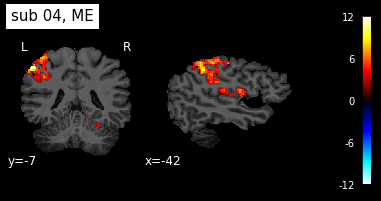

In [44]:
plotT(t_tmp_a, bg_tmp, sub, TR, c, [-42, -7], 12, "ME") #[-42, -7, 26]

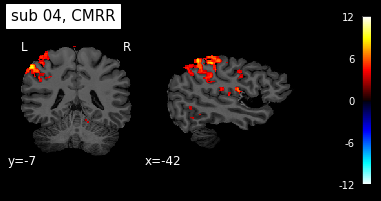

In [45]:
t_tmp = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glmTDFAST_HANDS/sub-%s/TR%s/THRSH/spmT_000%s_thresh.nii.gz'
plotT(t_tmp, bg_tmp, sub, '1510', c, [-42, -7], 12, "CMRR")

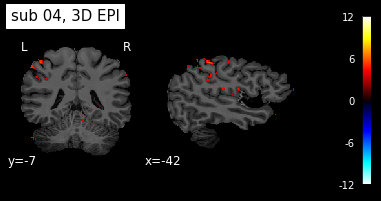

In [46]:
t_tmp = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glmTDFAST_HANDS/sub-%s/TR%s/THRSH/spmT_000%s_thresh.nii.gz'
plotT(t_tmp, bg_tmp, sub, '1920', c, [-42, -7], 12, "3D EPI")

### make into one mega plot

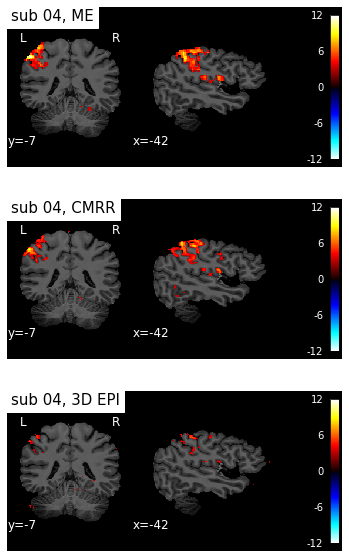

In [53]:
nrow =3
ncol = 1
figsz = [6, 10]
fa, (ax1, ax2, ax3) = plt.subplots(nrow, ncol, figsize=figsz)
plotT(t_tmp_a, bg_tmp, sub, '700', c, [-42, -7], 12, "ME", axes=ax1)
plotT(t_tmp, bg_tmp, sub, '1510', c, [-42, -7], 12, "CMRR", axes=ax2)
plotT(t_tmp, bg_tmp, sub, '1920', c, [-42,-7], 12, "3D EPI", axes=ax3)

### save

In [55]:
savename = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glmTDFAST_HANDS/sub-%s_tS.pdf' % '04'
fa.savefig(fname = savename, facecolor='k', edgecolor='k')

### tgt x cue interaction

In [61]:
t_tmp = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glmTDFAST_TC/sub-%s/TR%s/THRSH/spmT_000%s_thresh.nii.gz'
c=6

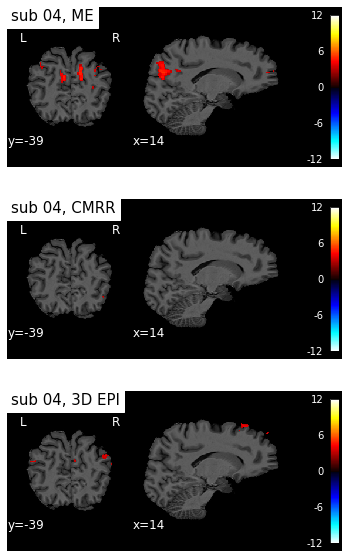

In [64]:
fb, (ax1, ax2, ax3) = plt.subplots(nrow, ncol, figsize=figsz)
plotT(t_tmp, bg_tmp, sub, '700', c, [14,-39], 12, "ME", axes=ax1)
plotT(t_tmp, bg_tmp, sub, '1510', c, [14,-39], 12, "CMRR", axes=ax2)
plotT(t_tmp, bg_tmp, sub, '1920', c, [14,-39], 12, "3D EPI", axes=ax3)

In [65]:
savename = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glmTDFAST_TC/sub-%s_TC_tS.pdf' % '04'
fb.savefig(fname = savename, facecolor='k', edgecolor='k')

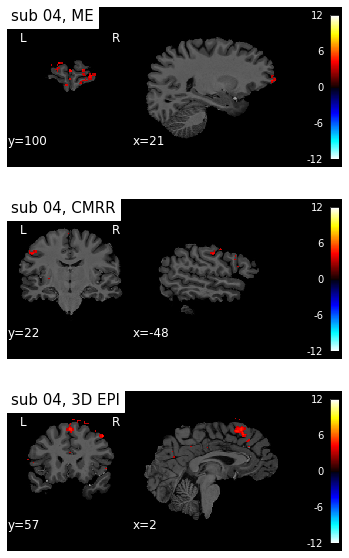

In [66]:
fc, (ax1, ax2, ax3) = plt.subplots(nrow, ncol, figsize=figsz)
plotT(t_tmp, bg_tmp, sub, '700', 4, None, 12, "ME", axes=ax1)
plotT(t_tmp, bg_tmp, sub, '1510', 4, None, 12, "CMRR", axes=ax2)
plotT(t_tmp, bg_tmp, sub, '1920', 4, None, 12, "3D EPI", axes=ax3)

### unthresholded t and ROIs

In [86]:
#### new figure for new demands!
def plotT(t, bg, maskpath, masks, sub, TR, contrast, coords, maxval, pname, axes=None):
    stats = t % (sub, TR, contrast)
    T1 = bg % (sub, sub)
    ms = [maskpath.format(subnum, TRnum, mask_name) for subnum in [sub] for TRnum in [TR] for mask_name in masks] 
    disp = niplt.plot_stat_map(stat_map_img=stats, 
                               bg_img=T1, 
                               cut_coords=coords, 
                               colorbar=True, 
                               axes=axes,
                               annotate=True,
                               symmetric_cbar=True,
                               draw_cross=False,
                               title= 'sub %s, %s' % (sub, pname),
                               black_bg=True,
                               vmax = maxval,
                               display_mode='yz') 
    disp.add_contours(ms[0])    
    disp.add_contours(ms[1]) 
    disp.add_contours(ms[2]) 
    disp.add_contours(ms[3]) 
    disp.add_contours(ms[4]) 
    disp.add_contours(ms[5])  
    return disp

In [84]:
sub = '04'
TR = '700'
c = '6'
bg_tmp = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glm/sub-%s/anat/sub-%s_desc-masked_T1w.nii.gz'
t_tmp = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glmTDFAST_TC/sub-%s/TR%s/FLGLM/spmT_000%s.nii'
maskpath = ''.join('/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glm/sub-{0}/TR{1}/MASKS/r{2}_trans.nii.gz')
masks = ['CN', 'GPi', 'STN', 'GPe', 'Put', 'VS']

/opt/miniconda-latest/envs/neuro/lib/python3.6/site-packages/nilearn/plotting/displays.py:99: UserWarning: No contour levels were found within the data range.
  **kwargs)


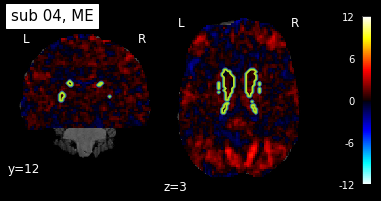

In [73]:
plotT(t_tmp, bg_tmp, maskpath, masks, sub, TR, c, None, 12, 'ME')

/opt/miniconda-latest/envs/neuro/lib/python3.6/site-packages/nilearn/plotting/displays.py:99: UserWarning: No contour levels were found within the data range.
  **kwargs)


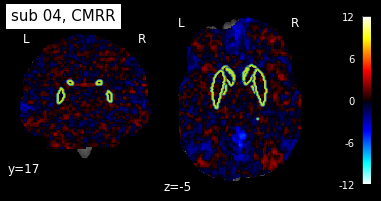

In [74]:
plotT(t_tmp, bg_tmp, maskpath, masks, sub, '1510', c, None, 12, 'CMRR')

/opt/miniconda-latest/envs/neuro/lib/python3.6/site-packages/nilearn/plotting/displays.py:99: UserWarning: No contour levels were found within the data range.
  **kwargs)


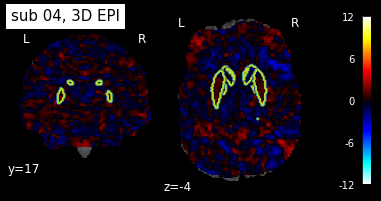

In [75]:
plotT(t_tmp, bg_tmp, maskpath, masks, sub, '1920', c, None, 12, '3D EPI')

/opt/miniconda-latest/envs/neuro/lib/python3.6/site-packages/nilearn/plotting/displays.py:99: UserWarning: No contour levels were found within the data range.
  **kwargs)
/opt/miniconda-latest/envs/neuro/lib/python3.6/site-packages/nilearn/plotting/displays.py:99: UserWarning: No contour levels were found within the data range.
  **kwargs)
/opt/miniconda-latest/envs/neuro/lib/python3.6/site-packages/nilearn/plotting/displays.py:99: UserWarning: No contour levels were found within the data range.
  **kwargs)


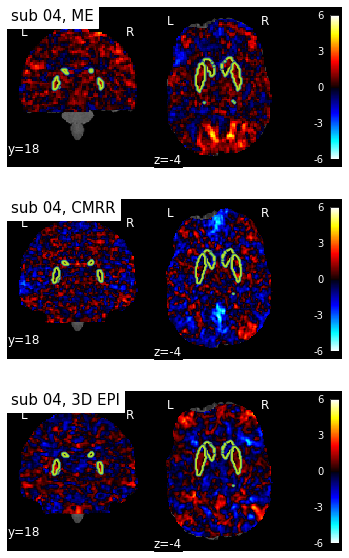

In [87]:
fd, (ax1, ax2, ax3) = plt.subplots(nrow, ncol, figsize=figsz)
plotT(t_tmp, bg_tmp, maskpath, masks, sub, '700', 6, [18, -4], 6, "ME", axes=ax1)
plotT(t_tmp, bg_tmp, maskpath, masks, sub, '1510', 6, [18, -4], 6, "CMRR", axes=ax2)
plotT(t_tmp, bg_tmp, maskpath, masks, sub, '1920', 6, [18, -4], 6, "3D EPI", axes=ax3)

In [88]:
savename = '/scratch/qbi/uqkgarn1/STRIWP1/derivatives/glmTDFAST_TC/sub-%s_TC_nothrsh_tS.pdf' % '04'
fd.savefig(fname = savename, facecolor='k', edgecolor='k')